In [25]:
import networkx as nx 
from networkx import Graph, DiGraph
import pandas as pd
import time
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Question 1
## part a

In [26]:
def get_graph_from_csv(filepath):
    df = pd.read_csv(filepath)
    graph = Graph()
    graph.add_edges_from(df.values)
    return graph

asia_graph = get_graph_from_csv('../data/lastfm_asia_edges.csv')
twitch_graph = get_graph_from_csv('../data/Twitch_ENGB_edges.csv')
print(asia_graph)
print(twitch_graph)

Graph with 7624 nodes and 27806 edges
Graph with 7126 nodes and 35324 edges


In [27]:
def get_average_degree(graph:Graph):
    """
    Get the average degree of a graph
    :param graph: Graph
    :return: Average degree
    """
    return sum(dict(graph.degree()).values()) / len(graph.nodes())

def plot_degree_distribution(graph:Graph, title:str):
    degrees = dict(graph.degree())
    degrees = np.array([d for d in degrees.values()])
    plt.hist(degrees, bins=100)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

def get_simulated_graph(graph:Graph):
    p = get_average_degree(graph)
    simulated_graph = Graph()
    simulated_graph.add_nodes_from(list(graph.nodes()))
    for i_node in tqdm(simulated_graph.nodes()):
        simulated_graph.add_node(i_node)
        for j_node in simulated_graph.nodes():
            if np.random.rand() < p / (len(simulated_graph.nodes()) - 1):
                simulated_graph.add_edge(i_node, j_node)
    return simulated_graph

def get_graph_info(graph:Graph):
    """Returns the average degree, the average path, the clustering 
    coefficient for the given graph

    Args:
        graph (Graph): _description_
    """
    avg_degree = get_average_degree(graph)
    avg_path = nx.average_shortest_path_length(graph)
    clustering_coefficient = nx.average_clustering(graph)
    return avg_degree, avg_path, clustering_coefficient

  0%|          | 0/7624 [00:00<?, ?it/s]

100%|██████████| 7624/7624 [01:13<00:00, 103.19it/s]


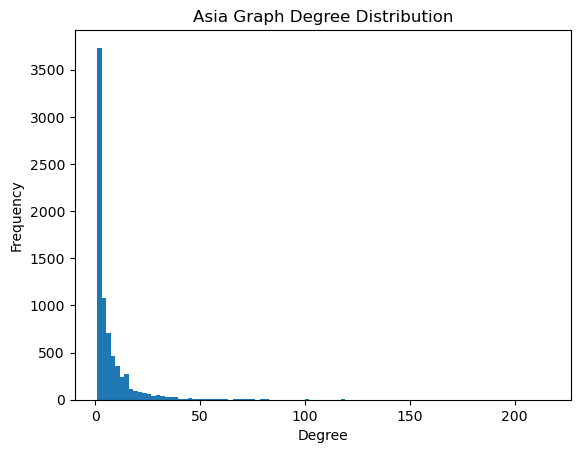

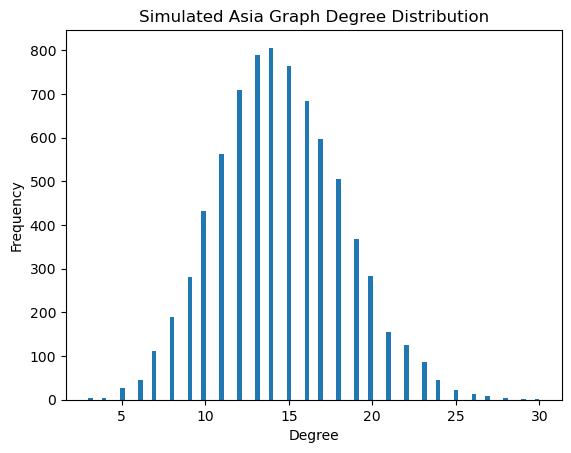

In [28]:
simulated_asia_graph = get_simulated_graph(asia_graph)

plot_degree_distribution(asia_graph, "Asia Graph Degree Distribution")
plot_degree_distribution(simulated_asia_graph, "Simulated Asia Graph Degree Distribution")

In [29]:
avg_degree_asia, avg_path_asia, clustering_coefficient_asia = get_graph_info(asia_graph)
avg_degree_simulated_asia, avg_path_simulated_asia, clustering_coefficient_simulated_asia = get_graph_info(simulated_asia_graph)

df = pd.DataFrame(columns=["Graph", "Average Degree", "Average Path", "Clustering Coefficient"])
df.loc[0] = ["Asia Graph", avg_degree_asia, avg_path_asia, clustering_coefficient_asia]
df.loc[1] = ["Simulated Asia Graph", avg_degree_simulated_asia, avg_path_simulated_asia, clustering_coefficient_simulated_asia]
df.head()

,Graph,Average Degree,Average Path,Clustering Coefficient
0,Asia Graph,7.294334,5.232237,0.219418
1,Simulated Asia Graph,14.494753,3.641387,0.002082


100%|██████████| 7126/7126 [00:56<00:00, 125.59it/s]


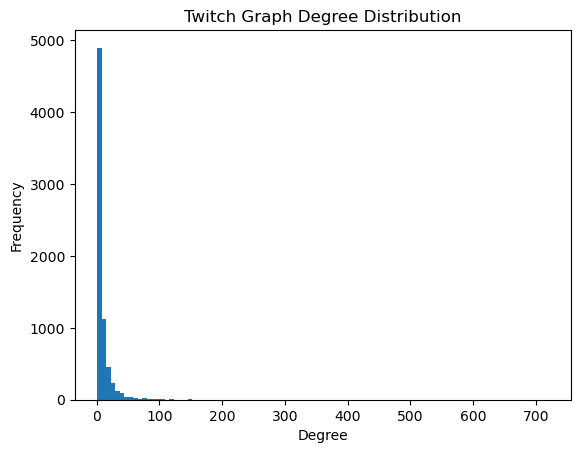

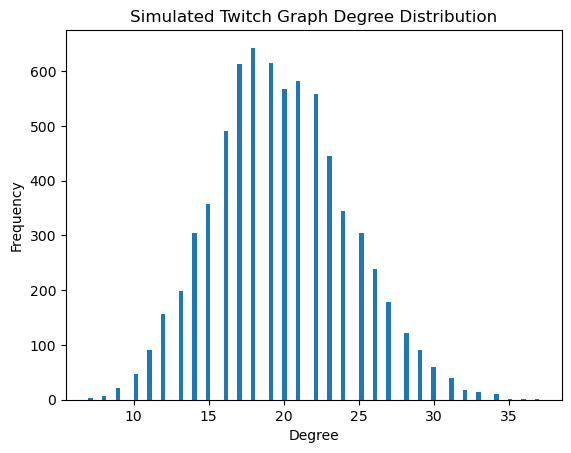

In [30]:
simulated_twitch_graph = get_simulated_graph(twitch_graph)
plot_degree_distribution(twitch_graph, "Twitch Graph Degree Distribution")
plot_degree_distribution(simulated_twitch_graph, "Simulated Twitch Graph Degree Distribution")

In [31]:
avg_degree_twitch, avg_path_twitch, clustering_coefficient_twitch = get_graph_info(twitch_graph)
avg_degree_simulated_twitch, avg_path_simulated_twitch, clustering_coefficient_simulated_twitch = get_graph_info(simulated_twitch_graph)
df = pd.DataFrame(columns=["Graph", "Average Degree", "Average Path", "Clustering Coefficient"])
df.loc[0] = ["Twitch Graph", avg_degree_twitch, avg_path_twitch, clustering_coefficient_twitch]
df.loc[1] = ["Simulated Twitch Graph", avg_degree_simulated_twitch, avg_path_simulated_twitch, clustering_coefficient_simulated_twitch]
df.head()

,Graph,Average Degree,Average Path,Clustering Coefficient
0,Twitch Graph,9.914117,3.677616,0.130928
1,Simulated Twitch Graph,19.777435,3.279562,0.002851
